In [1]:
2+2

4

In [5]:
!pip install seaborn

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame
import glob
glob.glob('/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales*.csv')

['/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv',
 '/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_

In [138]:
df = pd.read_csv('/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv', encoding = 'unicode_escape')

In [147]:
all_dfs = []
for one_filename in glob.glob('/Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales*.csv'):
                              print(f'loading {one_filename}')
                              new_df = pd.read_csv(one_filename)
                              all_dfs.append(new_df)
                        

loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv
loading /Users/sumitkumar/Downloads/Pandas-Data-Science-Tasks-master/S

In [153]:
len(all_dfs)

12

In [162]:
df = pd.concat(all_dfs)

### Augment data with additional columns

#### Add month column

In [180]:
df['Month'] = df['Order Date'].str[0:2]

### Clean up the data

#### Drop NaN rows

In [205]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df = df.dropna(how='all')
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


### *Find 'Or' and delete it*

In [216]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [217]:
df['Month'] = df['Month'].astype('int32')

#### Lets convert other column to correct type

In [221]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


### Add a sales column

In [223]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Add a city column

In [263]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA


## Q1. What was the best month for sales? How much was earned that month?

In [227]:
results = df.groupby('Month').sum()['Sales']

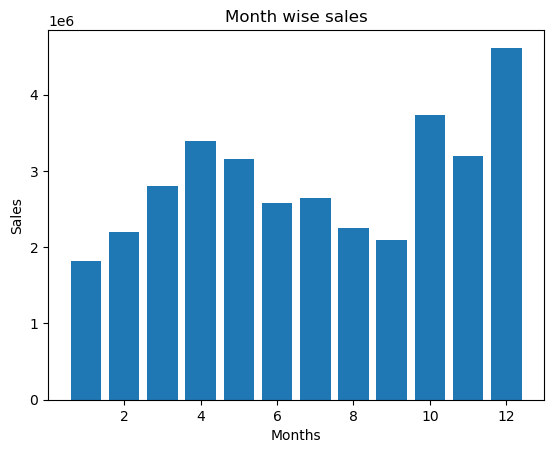

In [241]:
import matplotlib.pyplot as plt
Month = range(1,13)
plt.bar(Month,results)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Month wise sales')
plt.show()

## Q2. What city has the highest number of sales?

In [279]:
results1 = df.groupby('City').sum()['Sales']
results1

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

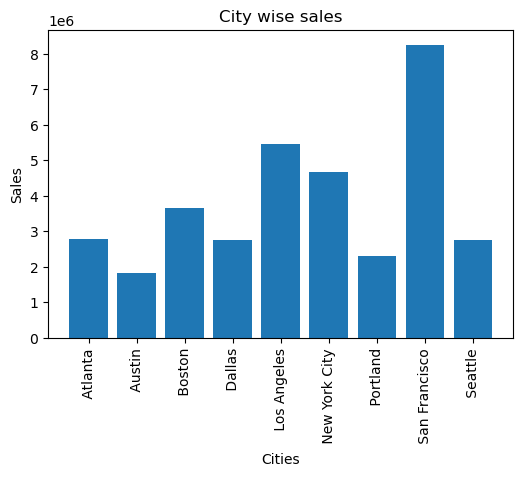

In [285]:
Cities = [city for city, df1 in df.groupby('City')]
plt.figure(figsize=(6,4))
plt.bar(Cities,results1)
plt.xticks(City, rotation = 'vertical', size = 10)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('City wise sales')
plt.show()

### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [295]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,12


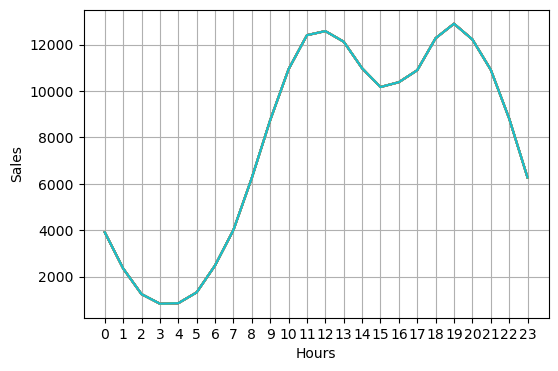

In [309]:
Hours = [hour for hour, df2 in df.groupby('Hour')]
plt.figure(figsize=(6,4))
plt.plot(Hours,df.groupby(['Hour']).count())
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.xticks(Hours)
plt.grid()
plt.show()  #From below graph, we should advertise at 12pm & 7pm

### Q4.What products are most often sold together?

In [336]:
df1 = df[df['Order ID'].duplicated(keep=False)]
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1.head()

/tmp/ipykernel_66380/1770822216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,14,"Vareebadd Phone,USB-C Charging Cable"


In [337]:
df1 = df1[['Order ID','Grouped']].drop_duplicates()
df1.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


#### Counting pair of products

In [358]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Q5.What product sold the most? Why do you think it sold the most?

In [368]:
product_group = df.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

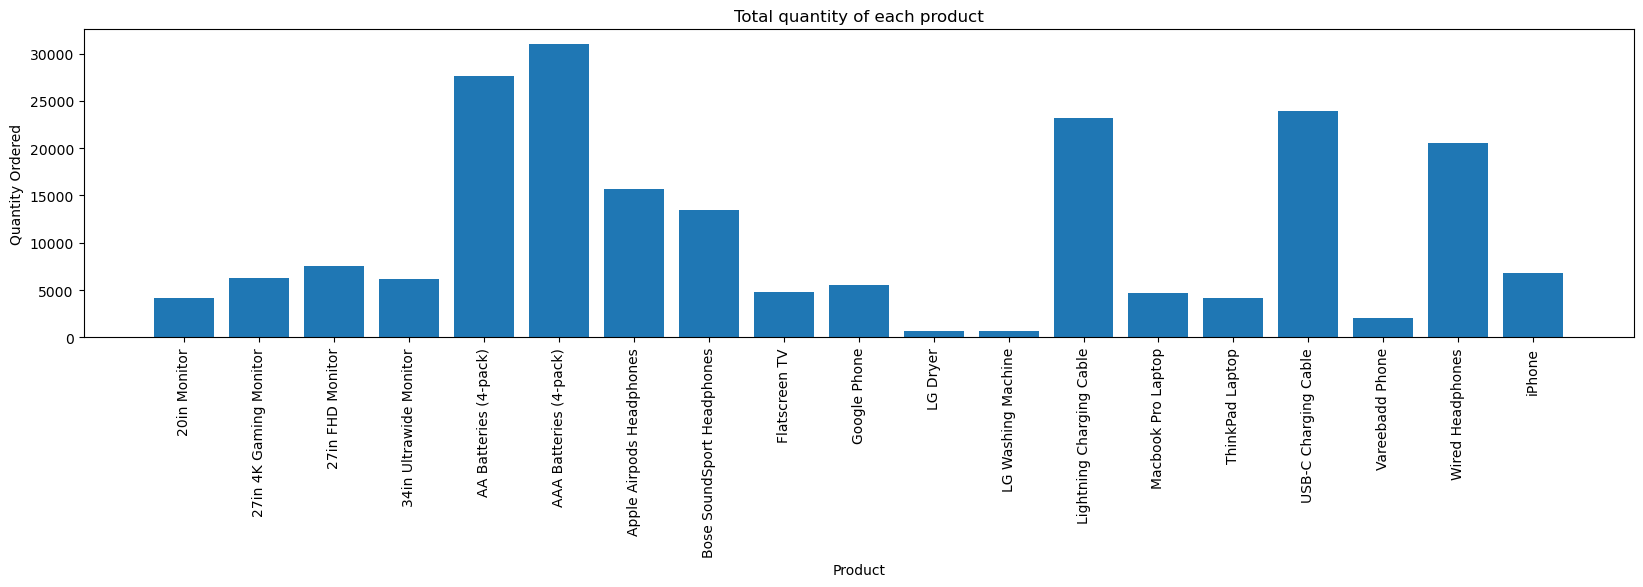

In [374]:
Product = [Product for Product, df2 in product_group]
plt.figure(figsize=(20,4))
plt.bar(Product,quantity_ordered)
plt.xticks(Product, rotation = 'vertical', size = 10)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total quantity of each product')
plt.show()

In [375]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

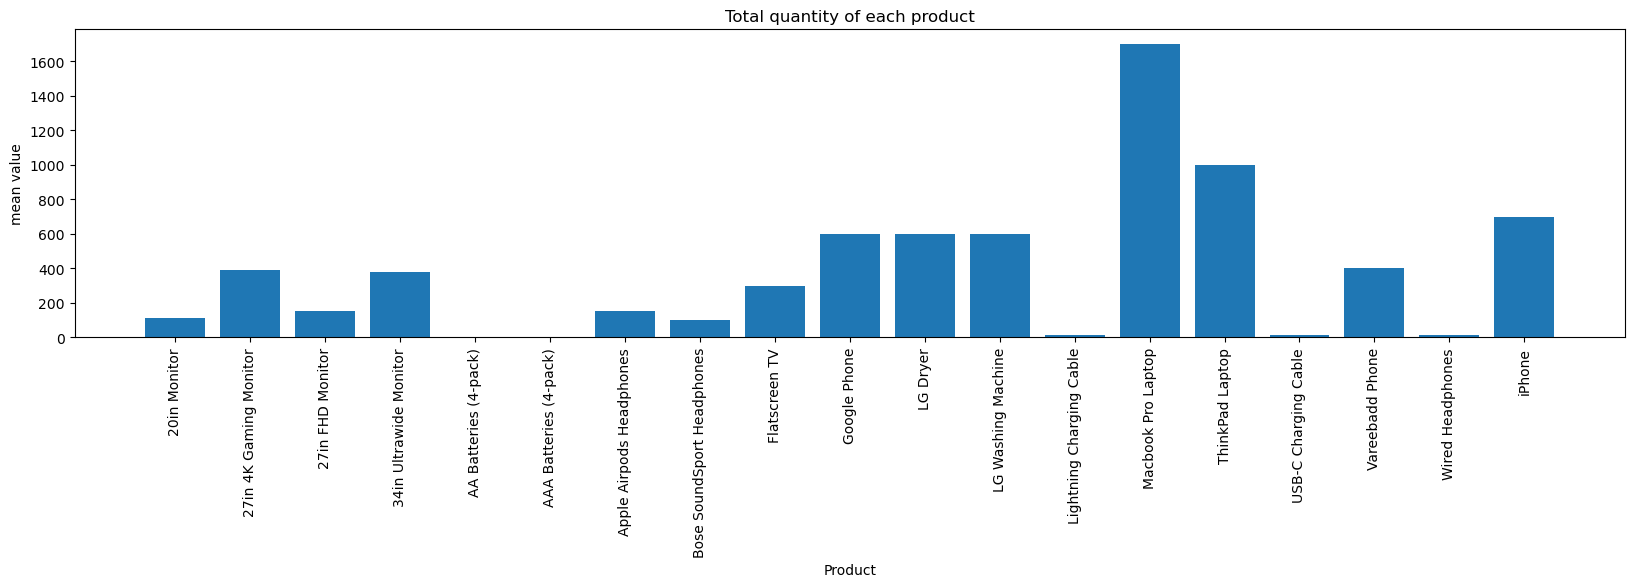

In [382]:
Product = [Product for Product, df2 in df.groupby('Product')]
mean_value = df.groupby('Product')['Price Each'].mean()
plt.figure(figsize=(20,4))
plt.bar(Product,mean_value)
plt.xticks(Product, rotation = 'vertical', size = 10)
plt.xlabel('Product')
plt.ylabel('mean value')
plt.title('Total quantity of each product')
plt.show()

#### Adding another y-axis to existing matplotlib

/tmp/ipykernel_66380/3540872657.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Product, rotation='vertical', size=8)
/tmp/ipykernel_66380/3540872657.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


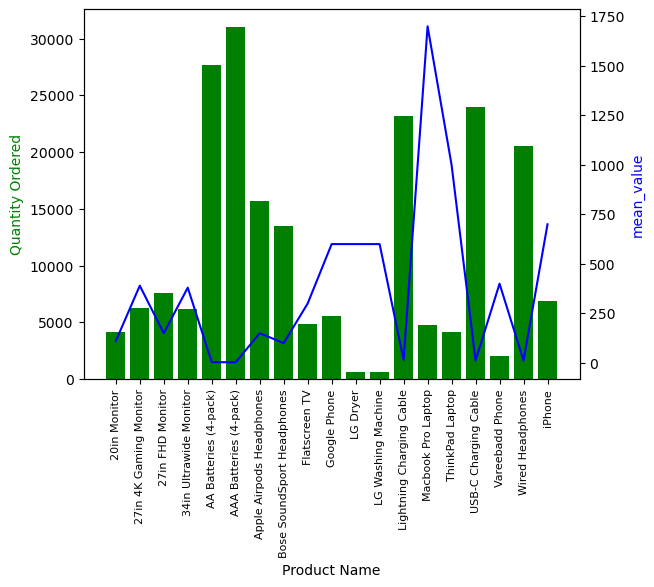

In [391]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product, quantity_ordered,color='g')
ax2.plot(Product, mean_value, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('mean_value', color='b')
ax1.set_xticklabels(Product, rotation='vertical', size=8)

fig.show()

### Data Analysis

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

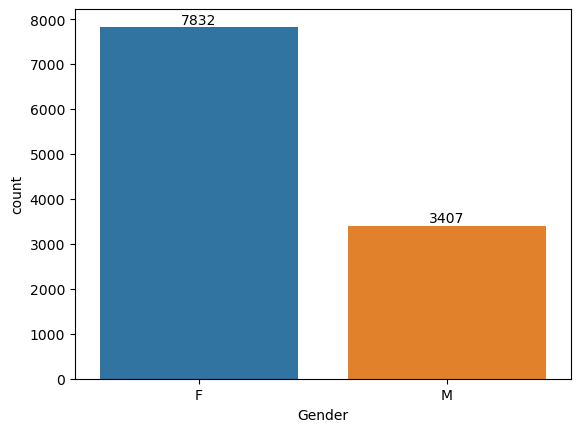

In [44]:
ax= sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [56]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

<Axes: xlabel='Gender', ylabel='Amount'>

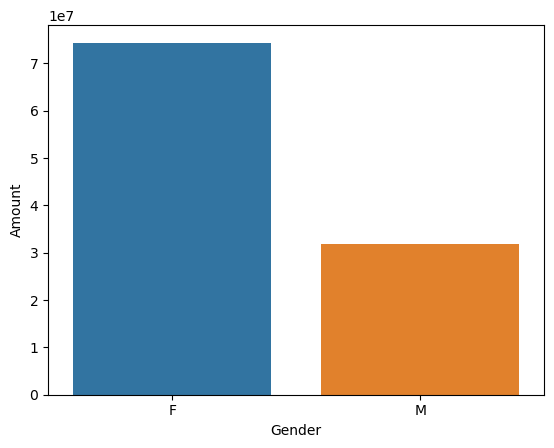

In [95]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

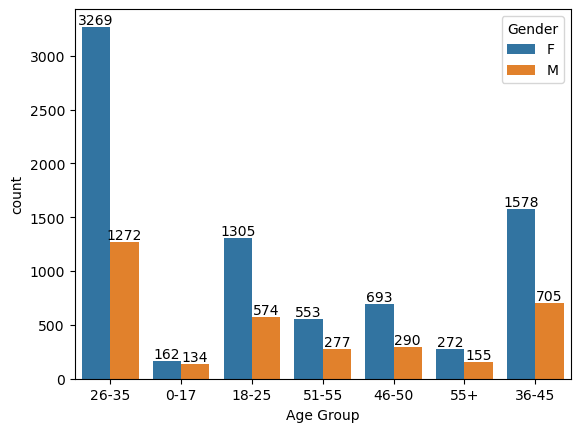

In [62]:
ax = sns.countplot(x='Age Group', data=df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

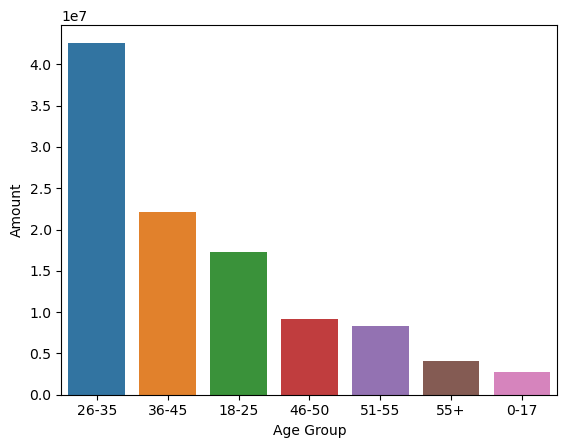

In [65]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

In [67]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

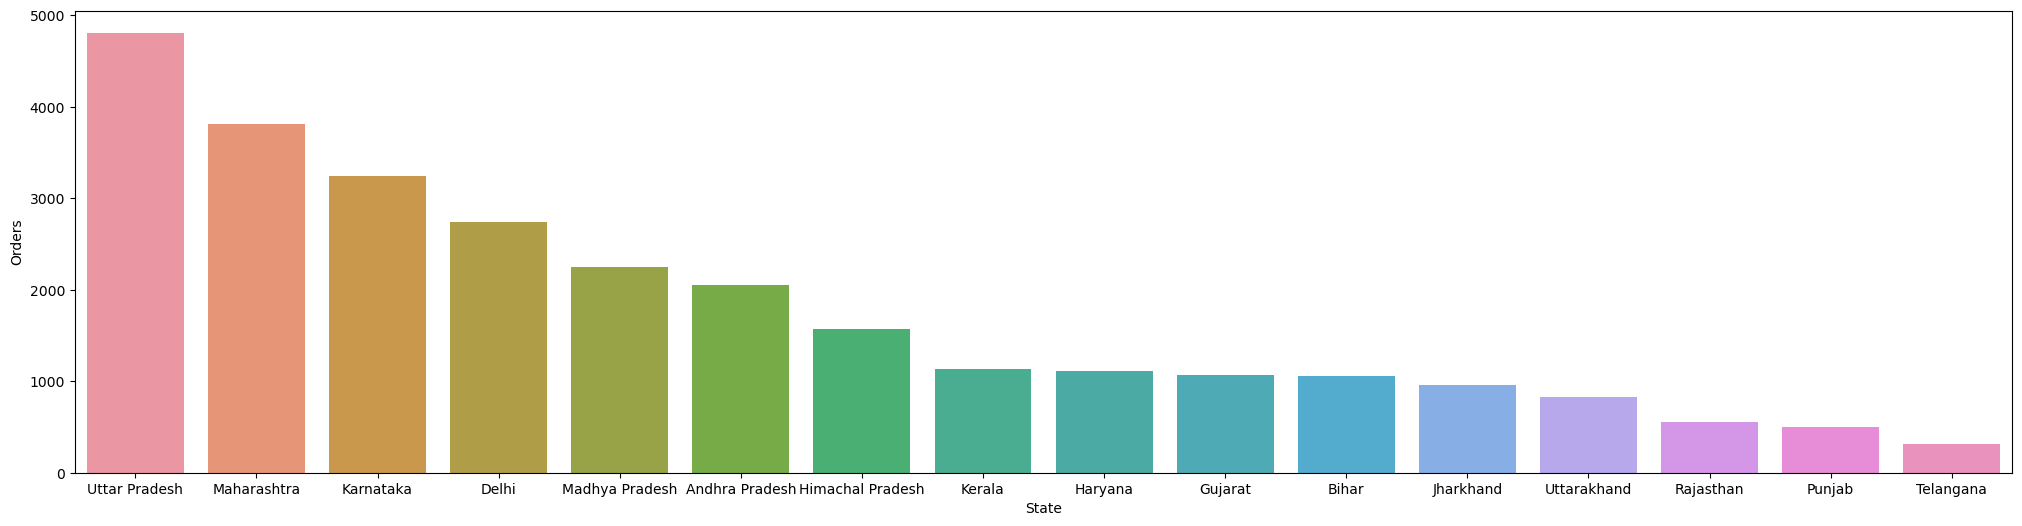

In [78]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
plt.figure(figsize=(25,6))
sns.barplot(x='State',y='Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

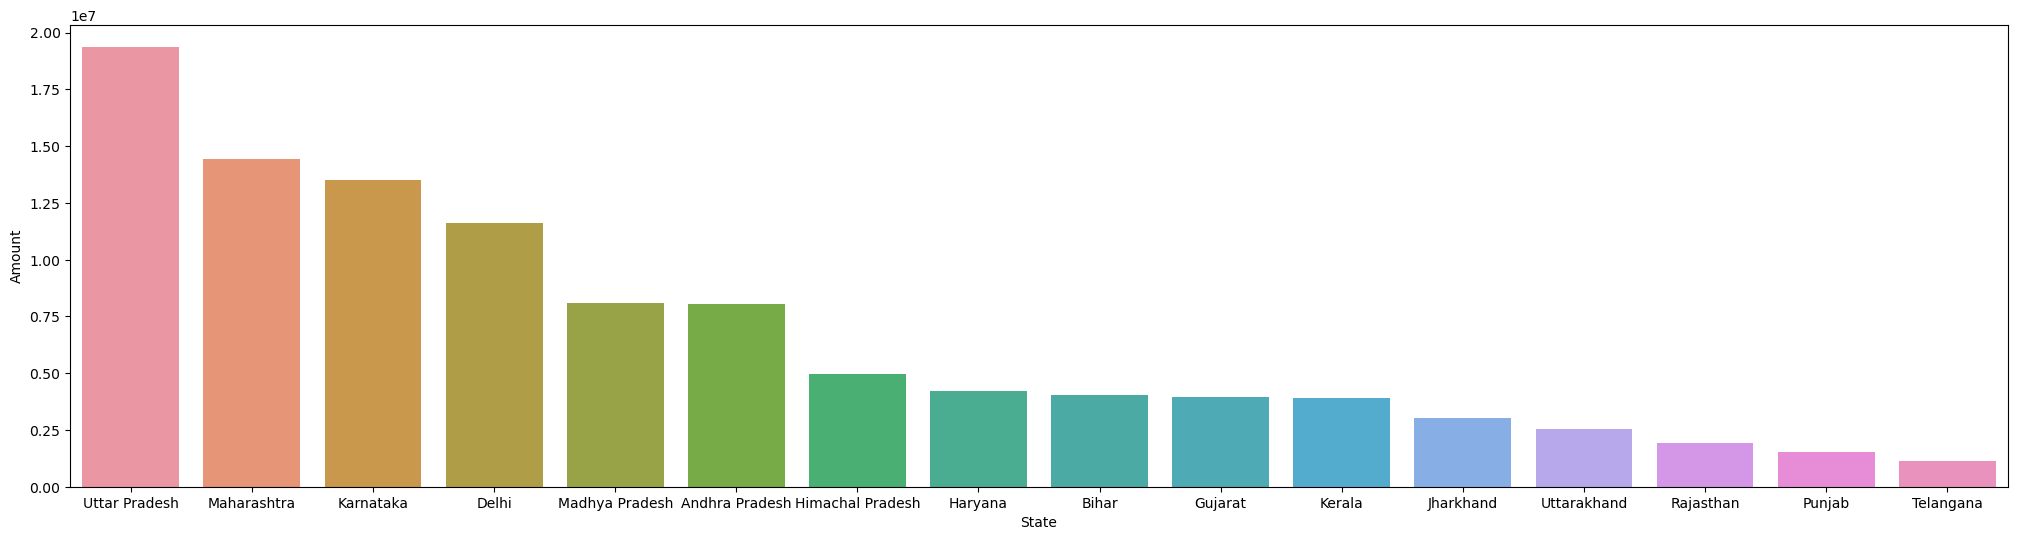

In [79]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(25,6))
sns.barplot(x='State',y='Amount', data=sales_state)

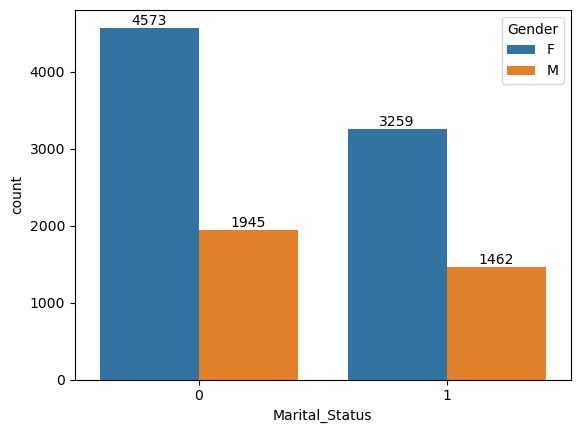

In [86]:
ax=sns.countplot(x='Marital_Status', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

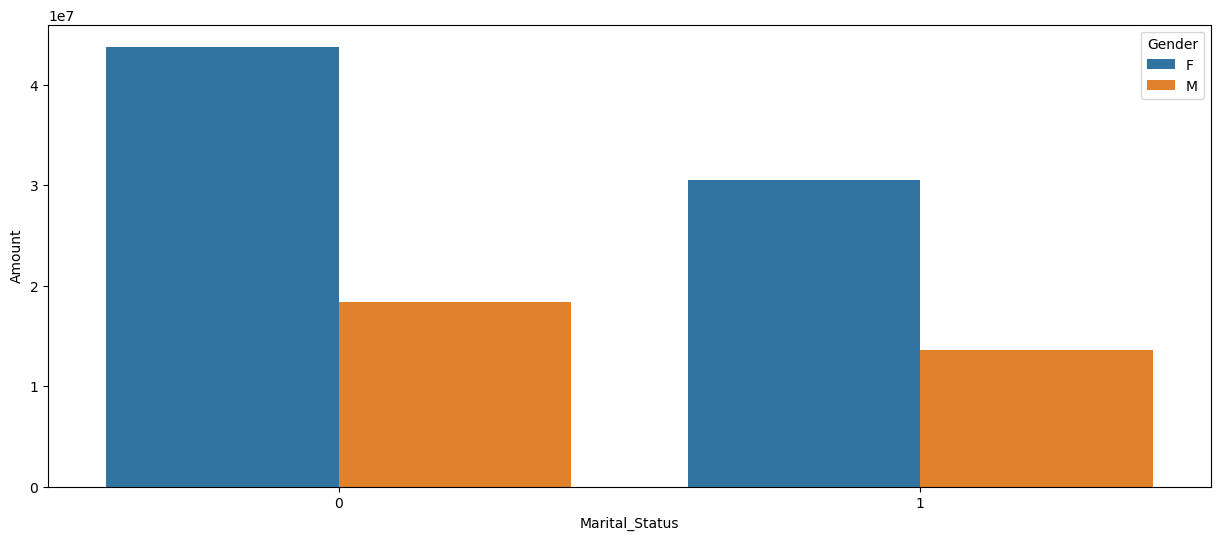

In [91]:
sales_state1 = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x='Marital_Status',y='Amount', hue='Gender', data=sales_state1)
    

<Axes: title={'center': 'Age'}, xlabel='Amount'>

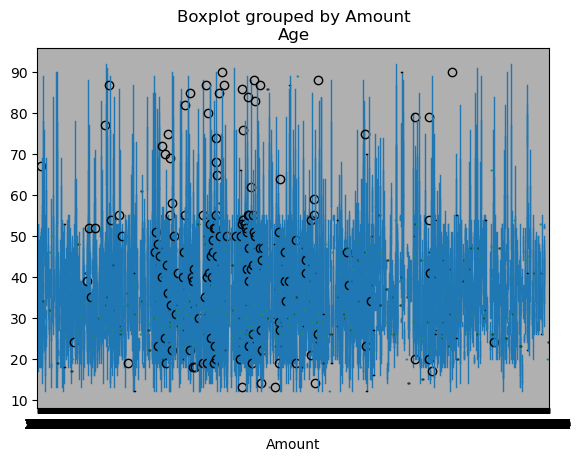

In [104]:
df.boxplot(column='Age', by='Amount')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [106]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64